In [3]:
!pip install bs4

In [4]:
import requests
import re
from bs4 import BeautifulSoup

In [5]:
def open_profile_data(server,name,tagline):
    leagueofgraphs_url = f"https://www.leagueofgraphs.com/summoner/{server}/{name}-{tagline}"

    try:
        response = requests.get(leagueofgraphs_url, headers = {'User-Agent': 'Mozilla/5.0'})
        response.raise_for_status()

        soup = BeautifulSoup(response.text, 'html.parser')
        return soup

    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return None

In [6]:
name = "biadee"
tagline = "eune"
server = "eune"
leagueofgraphs = open_profile_data(server,name,tagline)

## Get rank of user

In [7]:
leagueofgraphs


<!DOCTYPE html>

<html lang="en" xmlns="http://www.w3.org/1999/xhtml">
<head>
<link href="https://fonts.googleapis.com/css?family=Open+Sans:300,400,500,700" media="none" onload="this.media='all'" rel="stylesheet" type="text/css"/> <link href="//lolg-cdn.porofessor.gg/style.css?v=1713798443" rel="stylesheet" type="text/css">
<link href="//lolg-cdn.porofessor.gg/style.sprite.css?v=fcd4db6c7b68f9a6715ed72976823a75" rel="stylesheet" type="text/css"/>
<script src="//lolg-cdn.porofessor.gg/jquery.js?v=3"></script>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="en" http-equiv="content-language"/>
<meta content="Emerald I - Wins: 34 (64.2%) (#709,843) / Bard: Wins: 62.2% - Played: 45 / Warwick: Wins: 80.0% - Played: 5 / Caitlyn: Wins: 100.0% - Played: 1" name="description"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="origin" name="referrer"/>
<meta content="#

### Find league tier and LP

In [8]:
rank_element = leagueofgraphs.find(class_='leagueTier')
lp_element = leagueofgraphs.find(class_='leaguePoints')

rank_helper = rank_element.text.strip()
rank = re.sub(r'\s+', ' ', rank_helper) 

lp_helper = lp_element.text.strip()
lp = int(re.findall(r'\d+', lp_helper)[0])

rank_wo_div = rank.split()[0]
if(rank_wo_div == "Iron"): rank_num = 1
elif (rank_wo_div == "Bronze"): rank_num = 2
elif (rank_wo_div == "Silver"): rank_num = 3
elif (rank_wo_div == "Gold"): rank_num = 4
elif (rank_wo_div == "Platinum"): rank_num = 5
elif (rank_wo_div == "Emerald"): rank_num = 6
elif (rank_wo_div == "Diamond"): rank_num = 7
elif (rank_wo_div == "Master"): rank_num = 8
elif (rank_wo_div == "GrandMaster"): rank_num = 9
elif (rank_wo_div == "Challenger"): rank_num = 10
print(rank_num)

print(f"{name}#{tagline} is ranked as: {rank}, their LP is {lp}")


6
biadee#eune is ranked as: Emerald I, their LP is 75


### Find the profile icon

In [9]:
icon_element = leagueofgraphs.find(class_='img').find_next('img')
icon = re.search(r'.*?(\d+\.png)',icon_element['src'])
icon = icon.group(1)
print(icon)


25.png


### Find the level

In [10]:
level_element = leagueofgraphs.find(class_='bannerSubtitle')

level_helper = level_element.text.strip()
level_helper_1 = re.sub(r'-.+', '', level_helper)
level_helper_2 = re.findall(r'\d+', level_helper_1)
print(level_helper_2)



['58']


### Find wins and losses number

In [11]:
wins_element = leagueofgraphs.find(class_='winsNumber')
losses_element = leagueofgraphs.find(class_='lossesNumber')

wins = int(wins_element.text.strip())
losses = int(losses_element.text.strip())
winrate = round((wins/(wins+losses))*100, 3)
print(f"{name}#{tagline} has: {losses} losses and {wins} wins, their winrate is {winrate}")


biadee#eune has: 19 losses and 34 wins, their winrate is 64.151


### Get rankings

In [12]:
rank_element = leagueofgraphs.find(class_='rank')
global_rank_element = rank_element.find(class_='highlight')
regional_rank_element = rank_element.find(class_='regionalRank')
top_rank_percentage_element = rank_element.find(class_='topRankPercentage')

top_rank_percentage_helper = str(top_rank_percentage_element.string)
global_rank_helper = str(global_rank_element.string)
regional_rank_helper = re.findall(r'\d+(?:,\d+)?', regional_rank_element.string)[0]

top_rank_percentage_number = float(re.findall(r'\d+(?:.\d+)?', top_rank_percentage_helper)[0])
global_rank_number = re.sub(r',','', str(global_rank_helper))
regional_rank_number = re.sub(r',','', regional_rank_helper)

print(f"{name}#{tagline} is: Rank {global_rank_number} globally, making them be in the top {top_rank_percentage_number}%, their rank on {server} is {regional_rank_number} ")

biadee#eune is: Rank 709843 globally, making them be in the top 5.1%, their rank on eune is 71730 


### Get all played champion

In [13]:
champions_container = leagueofgraphs.find_all(class_='tabs-content')[1] #gives back the champions content box

# tr_elements = champions_container.find_all_next(class_="content")[0].find_next('table').find_all_next('tr')[1:11] #gives back the top 10 all queue champions of account
tr_elements = champions_container.find_all_next(class_="content")[1].find_next('table').find_all_next('tr')[1:11] #gives back the top 10 soloqueue champions of account
# tr_elements = champions_container.find_all_next(class_="content")[2].find_next('table').find_all_next('tr')[1:11] #gives back the top 10 flex champions of account
# tr_elements = champions_container.find_all_next(class_="content")[4].find_next('table').find_all_next('tr')[1:11] #gives back the top 10 aram champions of account

champions_dictionary = {}

i = 0
for el in tr_elements:
    champion_dict = {}
    champion = el.find('td').find_next('div').find_next(class_='txt')

    champion_dict['name'] = champion.find(class_='name').string

    if (champion.find(class_='top-rank') == None):
        champion_dict['top_rank'] = None
        champion_dict['regional_rank'] = None
    else:
        champion_dict['top_rank'] = champion.find(class_='top-rank').string
        champion_dict['regional_rank'] = champion.find(class_='regionalRank').string
    
    champion_dict['kills'] = champion.find(class_='kills').string
    champion_dict['deaths'] = champion.find(class_='deaths').string
    champion_dict['assists'] = champion.find(class_='assists').string

    champions_dictionary[i] = champion_dict
    i += 1
print(champions_dictionary)


AttributeError: 'NoneType' object has no attribute 'find_next'

In [14]:
# rank variable can be: iron, bronze, silver, gold, platinum, emerald, diamond, master
# note that when it's platinum there's no additional get request needed

def open_champion_data(rank):
    if (rank == 'platinum' or rank == '' or rank == None):
        leagueofgraphs_url = f"https://www.leagueofgraphs.com/champions/builds/sr-ranked/by-champion-name"
    else: leagueofgraphs_url = f"https://www.leagueofgraphs.com/champions/builds/{rank}/sr-ranked/by-champion-name"

    try:
        response = requests.get(leagueofgraphs_url, headers = {'User-Agent': 'Mozilla/5.0'})
        response.raise_for_status()

        soup = BeautifulSoup(response.text, 'html.parser')
        return soup

    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return None

In [15]:
rank = "emerald"
leagueofgraphs_champs = open_champion_data(rank)

In [16]:
leagueofgraphs_champs


<!DOCTYPE html>

<html lang="en" xmlns="http://www.w3.org/1999/xhtml">
<head>
<link href="https://fonts.googleapis.com/css?family=Open+Sans:300,400,500,700" media="none" onload="this.media='all'" rel="stylesheet" type="text/css"/> <link href="//lolg-cdn.porofessor.gg/style.css?v=1713798443" rel="stylesheet" type="text/css">
<link href="//lolg-cdn.porofessor.gg/style.sprite.css?v=fcd4db6c7b68f9a6715ed72976823a75" rel="stylesheet" type="text/css"/>
<script src="//lolg-cdn.porofessor.gg/jquery.js?v=3"></script>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="en" http-equiv="content-language"/>
<meta content="We track millions of LoL games played every day gathering champion stats, matchups, builds &amp; summoner rankings, as well as champion stats, popularity, winrate, teams rankings, best items and spells." name="description"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/

## Make JSON of datas for champions

In [17]:
leagueofgraphs_champs.find_all(class_='hide-for-dark')

tr_elements_champs = leagueofgraphs_champs.find(id='mainContent').find_next('div').find_next('div').find_next('div').find_next('table').find_all_next('tr')[1:180]

champions_stats = {}
tr_elements_champs

i = 0
for el in tr_elements_champs:
    if (i != 8 and i % 16 != 0 or i == 0): 
        cur_champ_data = {}
        champion = el.find('td')

        name = re.sub(r'\s+', '', champion.find_next(class_='name').string)

        cur_champ_data['popularity'] = round(float(champion.find_all_next('progressbar')[0]['data-value'])*100,2)
        cur_champ_data['winrate'] = round(float(champion.find_all_next('progressbar')[1]['data-value'])*100,2)
        cur_champ_data['banrate'] = round(float(champion.find_all_next('progressbar')[2]['data-value'])*100,2)

        cur_champ_data['avg.kills'] = float(champion.find_next(class_='kills').string)
        cur_champ_data['avg.deaths'] = float(champion.find_next(class_='deaths').string)
        cur_champ_data['avg.assists'] = float(champion.find_next(class_='assists').string)

        champions_stats[name] = cur_champ_data
    i += 1    

print(champions_stats)

{'Aatrox': {'popularity': 11.45, 'winrate': 49.67, 'banrate': 14.77, 'avg.kills': 6.1, 'avg.deaths': 6.2, 'avg.assists': 5.3}, 'Ahri': {'popularity': 13.07, 'winrate': 51.75, 'banrate': 16.4, 'avg.kills': 6.4, 'avg.deaths': 5.3, 'avg.assists': 7.8}, 'Akali': {'popularity': 9.91, 'winrate': 49.24, 'banrate': 17.55, 'avg.kills': 8.6, 'avg.deaths': 5.9, 'avg.assists': 4.8}, 'Akshan': {'popularity': 2.92, 'winrate': 50.68, 'banrate': 5.18, 'avg.kills': 8.5, 'avg.deaths': 6.3, 'avg.assists': 5.7}, 'Alistar': {'popularity': 4.17, 'winrate': 50.01, 'banrate': 1.7, 'avg.kills': 1.7, 'avg.deaths': 6.5, 'avg.assists': 14.6}, 'Amumu': {'popularity': 2.76, 'winrate': 49.43, 'banrate': 0.63, 'avg.kills': 4.3, 'avg.deaths': 6.3, 'avg.assists': 11.2}, 'Anivia': {'popularity': 2.77, 'winrate': 52.36, 'banrate': 1.98, 'avg.kills': 5.8, 'avg.deaths': 4.9, 'avg.assists': 7.9}, 'Annie': {'popularity': 2.7, 'winrate': 51.38, 'banrate': 0.62, 'avg.kills': 6.2, 'avg.deaths': 6.3, 'avg.assists': 8.9}, 'Apheli

### Some graphs

C:\Users\patri\AppData\Local\Temp\ipykernel_23484\2546056435.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10_popular_champions.index, x=top_10_popular_champions.values, palette='viridis')


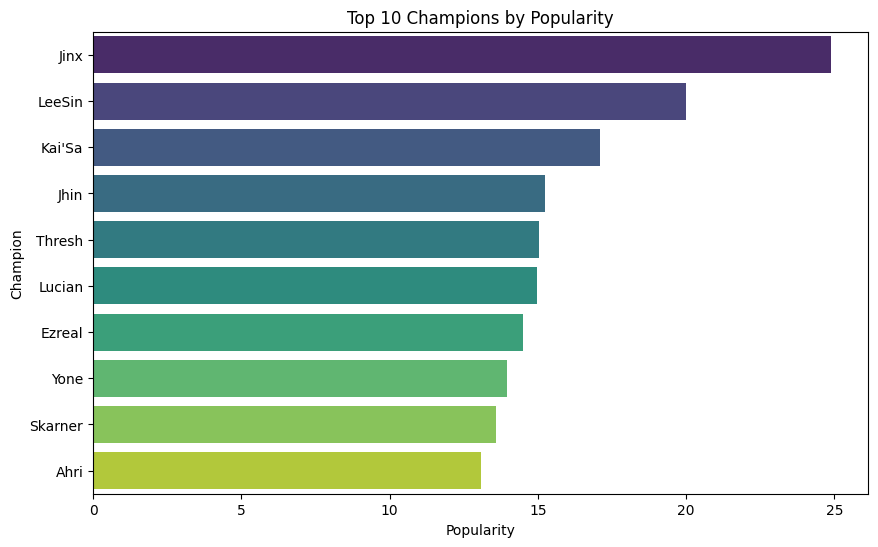

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.DataFrame.from_dict(champions_stats, orient='index')

top_10_popular_champions = df['popularity'].nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(y=top_10_popular_champions.index, x=top_10_popular_champions.values, palette='viridis')
plt.xlabel('Popularity')
plt.ylabel('Champion')
plt.title('Top 10 Champions by Popularity')
plt.show()

C:\Users\patri\AppData\Local\Temp\ipykernel_23484\2081407312.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='winrate', y='banrate', size='popularity', sizes=(100, 400), data=df, palette=custom_palette, edgecolor='black', alpha=0.8)


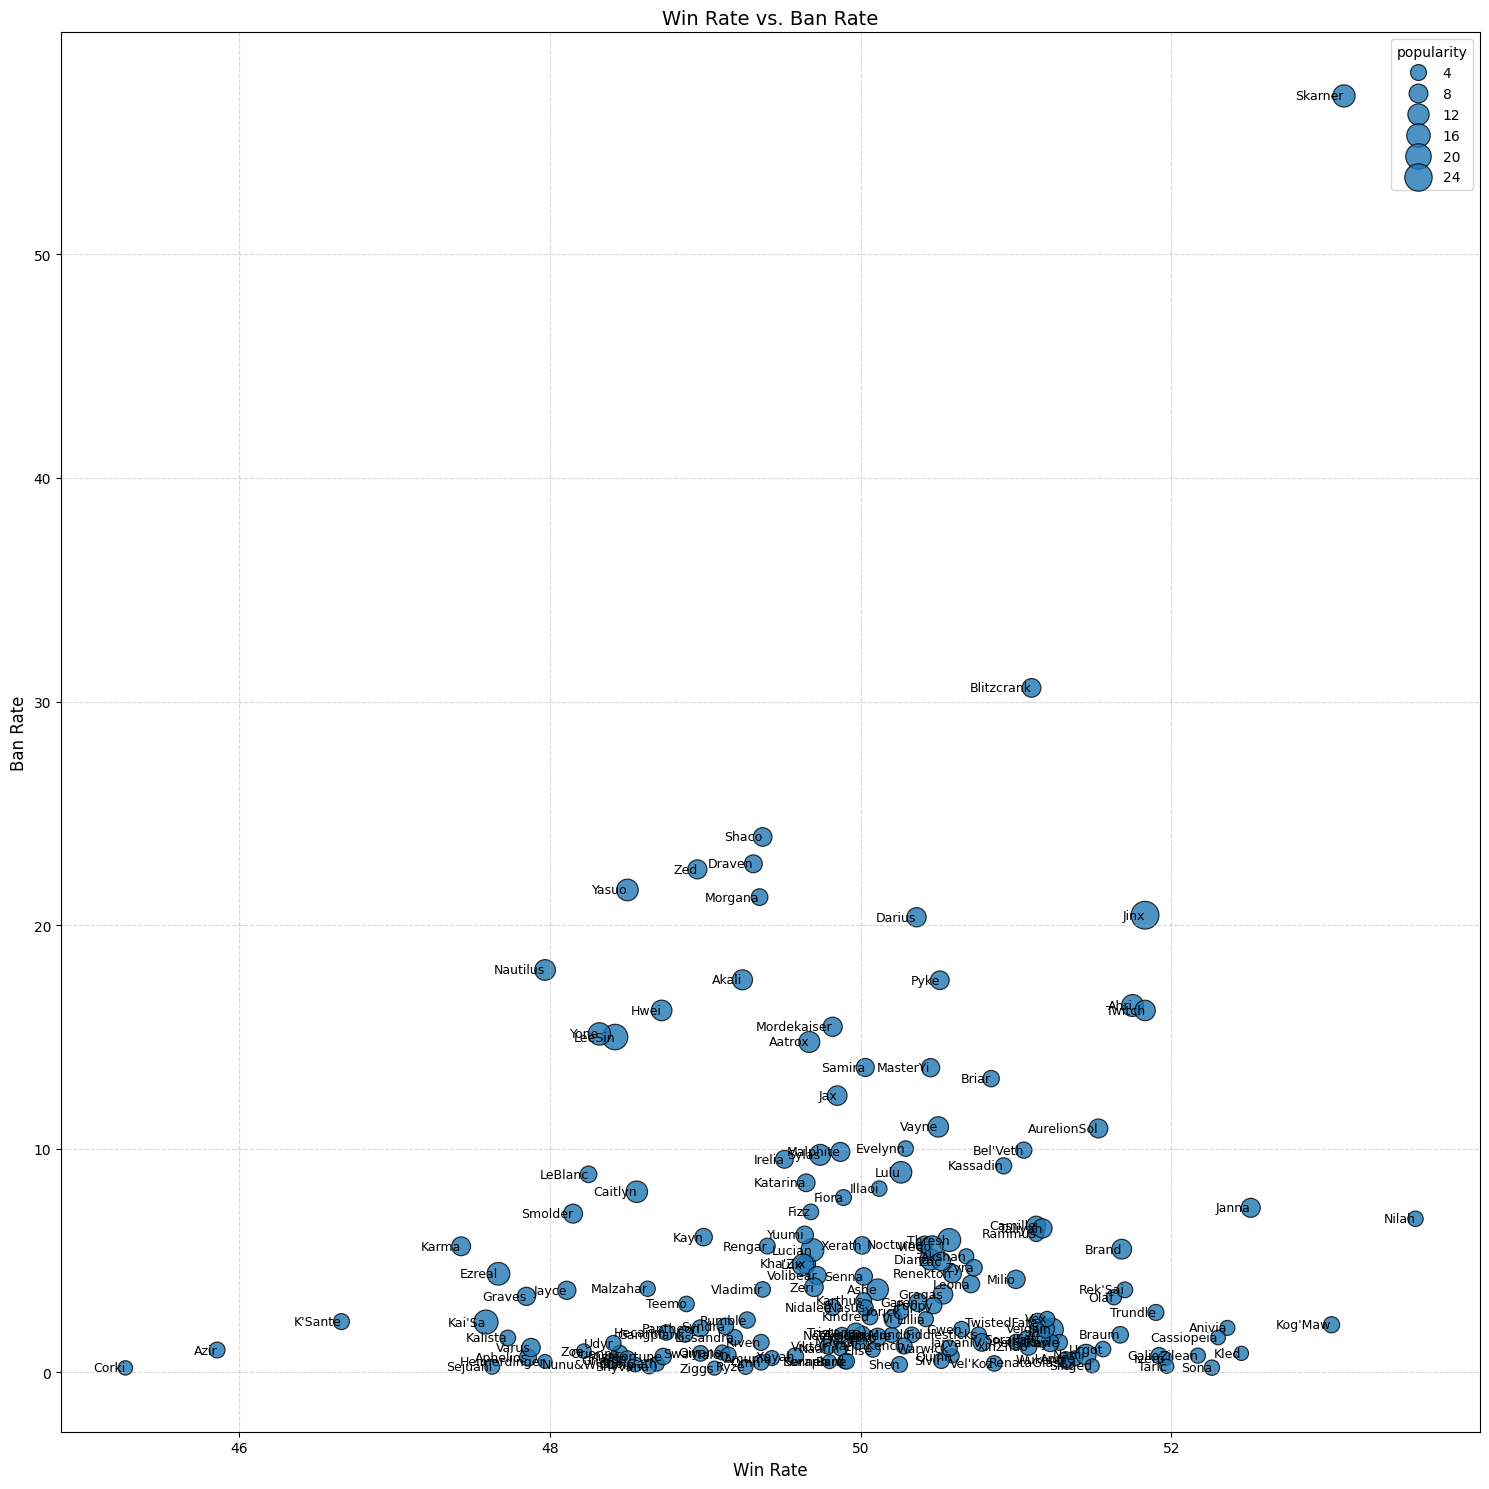

In [20]:
custom_palette = sns.color_palette("coolwarm", as_cmap=True)

plt.figure(figsize=(15,15))
sns.scatterplot(x='winrate', y='banrate', size='popularity', sizes=(100, 400), data=df, palette=custom_palette, edgecolor='black', alpha=0.8)

for champ, (winrate, banrate) in df[['winrate', 'banrate']].iterrows():
    plt.text(winrate, banrate, champ, fontsize=9, ha='right', va='center', color='black')

plt.xlabel('Win Rate', fontsize=12)
plt.ylabel('Ban Rate', fontsize=12)
plt.title('Win Rate vs. Ban Rate', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Win rate heatmaps

C:\Users\patri\AppData\Local\Temp\ipykernel_11304\41637896.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  win_rate_heatmap = df.groupby('win_rate_range').size().reset_index(name='count').pivot(columns='win_rate_range', values='count')


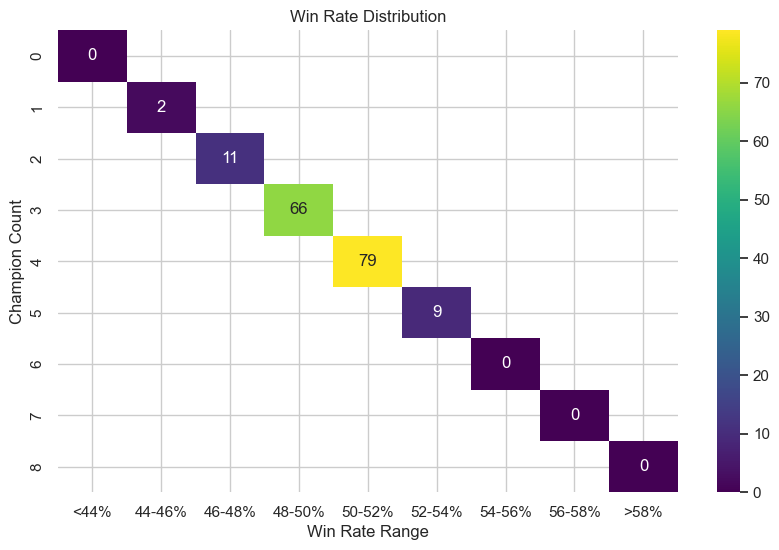

In [ ]:
win_rate_bins = [0, 44, 46, 48, 50, 52, 54, 56, 58, 100]
win_rate_labels = ['<44%','44-46%', '46-48%', '48-50%', '50-52%', '52-54%', '54-56%', '56-58%', '>58%']

df['win_rate_range'] = pd.cut(df['winrate'], bins=win_rate_bins, labels=win_rate_labels)

win_rate_heatmap = df.groupby('win_rate_range').size().reset_index(name='count').pivot(columns='win_rate_range', values='count')

plt.figure(figsize=(10,6))
sns.heatmap(win_rate_heatmap, cmap='viridis', annot=True, fmt='.0f')
plt.xlabel('Win Rate Range')
plt.ylabel('Champion Count')
plt.title('Win Rate Distribution')
plt.show()

C:\Users\patri\AppData\Local\Temp\ipykernel_11304\3688367357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_df['Champion'] = stats_df.index


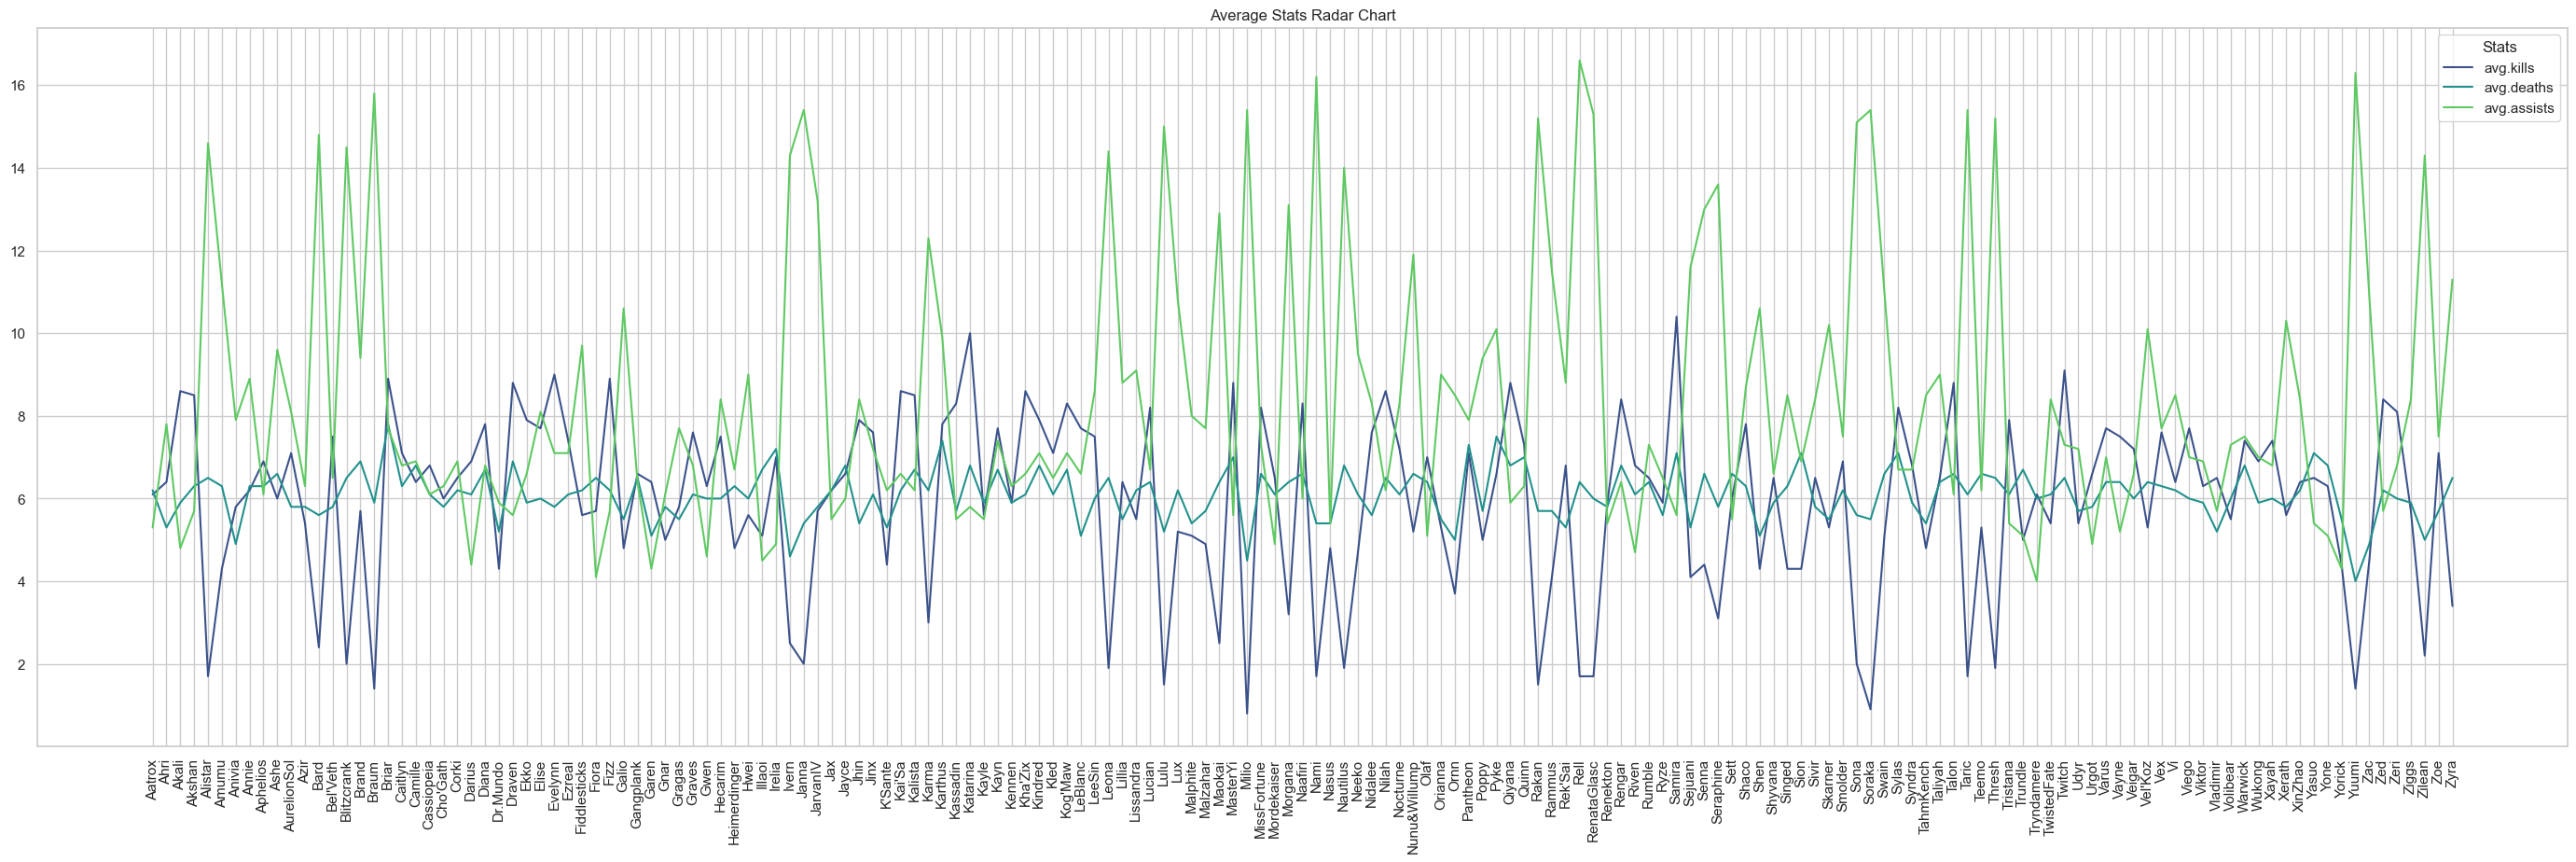

In [ ]:
stats_df = df[['avg.kills', 'avg.deaths', 'avg.assists']]
stats_df['Champion'] = stats_df.index

plt.figure(figsize=(35,10))
sns.lineplot(data=stats_df, dashes=False, palette='viridis')
plt.title('Average Stats Radar Chart')
plt.legend(title='Stats')

plt.xticks(rotation=90, ha='center')

plt.show()

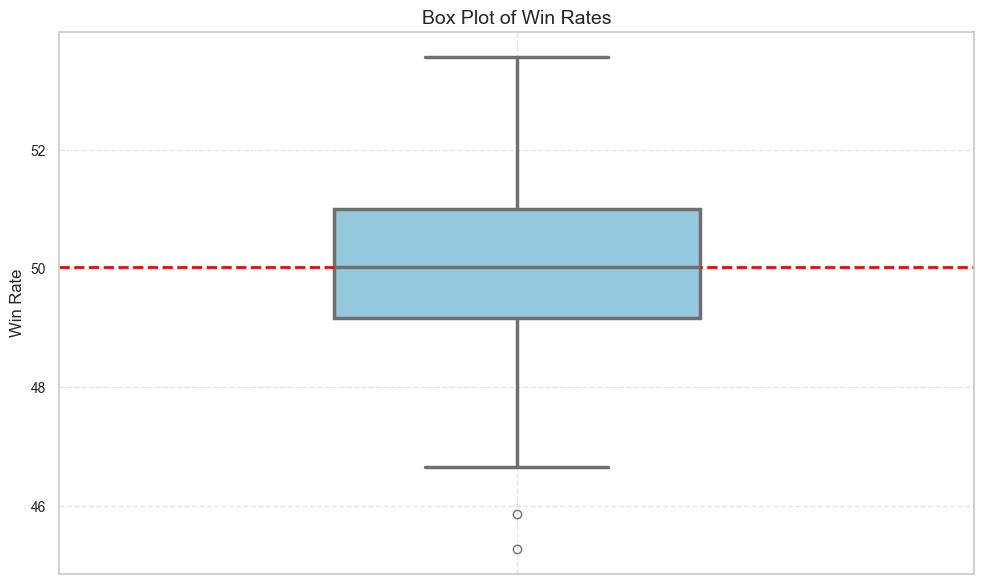

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.boxplot(y=df['winrate'], orient='v', color='skyblue', linewidth=2.5, width=0.4)

plt.axhline(y=df['winrate'].median(), color='red', linestyle='--', linewidth=2)

plt.ylabel('Win Rate', fontsize=12)
plt.title('Box Plot of Win Rates', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

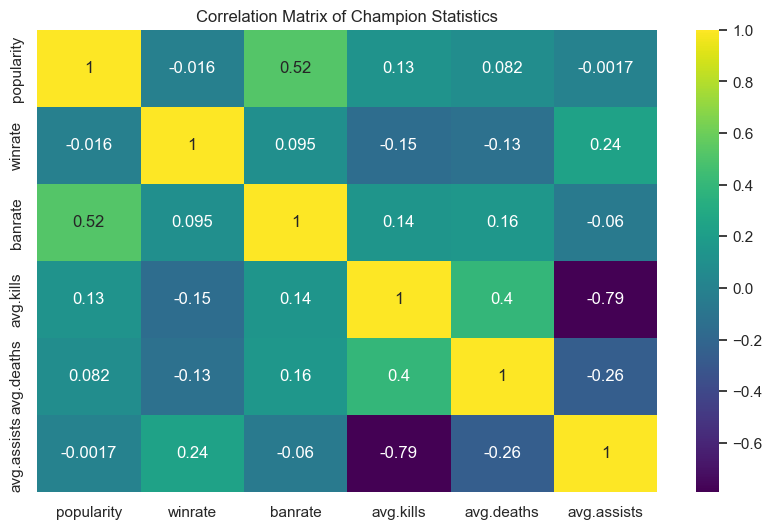

In [ ]:
df_numeric = df[['popularity', 'winrate', 'banrate', 'avg.kills', 'avg.deaths', 'avg.assists']]
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix of Champion Statistics')
plt.show()